<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/C_funcion_perdida_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
def perdida_listas(ranking_real, ranking_predicho):
    diferencias = tf.abs(ranking_real - ranking_predicho)
    perdida_total = tf.reduce_sum(diferencias)
    """
    Una opción podría ser cambiar tf.reduce_sum() por tf.reduce_mean() para tomar el promedio de las diferencias en lugar de la suma. Esto hará que la pérdida sea independiente del tamaño del lote de datos.
    """
    return perdida_total


In [3]:
ranking_real = np.array([[6,3,2,4,5,1]])
ranking_real

array([[6, 3, 2, 4, 5, 1]])

In [4]:
ranking_predicho = np.array([[1,2,3,6,5,4]])
ranking_predicho

array([[1, 2, 3, 6, 5, 4]])

In [5]:
diferencias = tf.abs(ranking_real - ranking_predicho)
diferencias

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[5, 1, 1, 2, 0, 3]])>

In [6]:
perdida_total = tf.reduce_sum(diferencias)
perdida_total

<tf.Tensor: shape=(), dtype=int64, numpy=12>

In [7]:
perdida_listas(ranking_real, ranking_predicho)

<tf.Tensor: shape=(), dtype=int64, numpy=12>

# asignar más peso a las diferencias que corresponden a números más bajos en el ranking real.

castiga cuando los mejores estan clasificados como peores

In [8]:
def perdida_listas(ranking_real, ranking_predicho):
    diferencias = tf.abs(ranking_real - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_real + 1e-7)  # Añadimos un pequeño número para evitar la división por cero
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return perdida_total

In [9]:
ranking_real, ranking_predicho

(array([[6, 3, 2, 4, 5, 1]]), array([[1, 2, 3, 6, 5, 4]]))

In [10]:
diferencias = tf.abs(ranking_real - ranking_predicho)
diferencias

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[5, 1, 1, 2, 0, 3]])>

In [11]:
diferencias_ponderadas = diferencias / (ranking_real + 1e-7)
diferencias_ponderadas.numpy()

array([[0.83333333, 0.33333333, 0.5       , 0.5       , 0.        ,
        3.        ]])

In [12]:
perdida_total = tf.reduce_sum(diferencias_ponderadas)
perdida_total

<tf.Tensor: shape=(), dtype=float64, numpy=5.166666666666667>

In [13]:
perdida_listas(ranking_real, ranking_predicho)

<tf.Tensor: shape=(), dtype=float64, numpy=5.166666666666667>

## inversa

castiga cuando los peores estan clasificados como mejores

In [14]:
ranking_real, ranking_predicho

(array([[6, 3, 2, 4, 5, 1]]), array([[1, 2, 3, 6, 5, 4]]))

In [15]:
diferencias = tf.abs(ranking_real - ranking_predicho)
diferencias

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[5, 1, 1, 2, 0, 3]])>

In [16]:
diferencias_ponderadas = diferencias / (ranking_predicho + 1e-7)
diferencias_ponderadas.numpy()

array([[5.        , 0.5       , 0.33333333, 0.33333333, 0.        ,
        0.75      ]])

In [17]:
def perdida_listas(ranking_real, ranking_predicho):
    ranking_real = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_real + 0.01)  # Añadimos un pequeño número para evitar la división por cero
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return perdida_total

In [18]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

----

In [19]:
diferencias = tf.abs(np.array([1,2,3]) - np.array([10,2,3]))
diferencias

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([9, 0, 0])>

In [20]:
diferencias_ponderadas = diferencias / ( np.array([1,2,3])  + 1e-7)
diferencias_ponderadas.numpy()

array([9., 0., 0.])

In [21]:
loss_ranking(
    np.array([1,2,3]),
    np.array([1,2,10])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=0.6993007>

In [22]:
diferencias = tf.abs(np.array([1,2,3]) - np.array([10,2,3]))
diferencias

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([9, 0, 0])>

In [23]:
diferencias_ponderadas = diferencias / (np.array([10,2,3]) + 1e-7)
diferencias_ponderadas.numpy()

array([0.9, 0. , 0. ])

In [24]:
loss_ranking(
    np.array([1,2,3]),
    np.array([10,2,3])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=0.8991009>

In [25]:
perdida_listas(
    np.array([1,2,3]),
    np.array([1,2,10])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=2.3255813>

In [26]:
perdida_listas(
    np.array([1,2,3]),
    np.array([10,2,3])
    )

<tf.Tensor: shape=(), dtype=float32, numpy=8.910892>

In [27]:
tf.keras.metrics.mean_squared_error(
    np.array([1,2,3]),
    np.array([10,2,3])
)

<tf.Tensor: shape=(), dtype=int64, numpy=27>

In [28]:
tf.keras.metrics.mean_squared_error(
    np.array([1,2,3]),
    np.array([1,2,10])
)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

# ANALISIS FUNCION DE PERDIDA

In [29]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

def perdida_listas(ranking_real, ranking_predicho):
    ranking_real = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_real + 0.01)  # Añadimos un pequeño número para evitar la división por cero
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return perdida_total

def diferencia_listas(ranking_real, ranking_predicho):
    ranking_real = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real - ranking_predicho)
    perdida_total = tf.reduce_sum(diferencias)
    """
    Una opción podría ser cambiar tf.reduce_sum() por tf.reduce_mean() para tomar el promedio de las diferencias en lugar de la suma. Esto hará que la pérdida sea independiente del tamaño del lote de datos.
    """
    return perdida_total

def mse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    squared_differences = tf.square(y_true - y_pred)
    mean_squared_error = tf.reduce_mean(squared_differences)
    return mean_squared_error

def mae(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    absolute_differences = tf.abs(y_true - y_pred)
    mean_absolute_error = tf.reduce_mean(absolute_differences)
    return mean_absolute_error



In [30]:
r_pred = np.array([[18, 28,  3, 23, 29, 20, 15, 21, 22, 27, 10, 14, 13,  6, 19, 11,
         5, 25,  4, 30,  7, 12, 17, 26,  9,  2,  0, 16,  8, 24,  1]])

r_real = np.array([25, 19, 13, 17, 16, 27, 29, 30, 15,  0,  3, 22,  1,  8,  2, 18, 10,
        4, 20,  6, 12, 26,  7, 14, 24, 23, 21, 11, 28,  5,  9])

r_real = tf.cast(r_real, tf.float32)
r_pred = tf.cast(r_pred, tf.float32)

In [31]:
diferencias = tf.abs(r_pred - r_real)
diferencias

<tf.Tensor: shape=(1, 31), dtype=float32, numpy=
array([[ 7.,  9., 10.,  6., 13.,  7., 14.,  9.,  7., 27.,  7.,  8., 12.,
         2., 17.,  7.,  5., 21., 16., 24.,  5., 14., 10., 12., 15., 21.,
        21.,  5., 20., 19.,  8.]], dtype=float32)>

In [32]:
(r_pred + 0.1)

<tf.Tensor: shape=(1, 31), dtype=float32, numpy=
array([[18.1, 28.1,  3.1, 23.1, 29.1, 20.1, 15.1, 21.1, 22.1, 27.1, 10.1,
        14.1, 13.1,  6.1, 19.1, 11.1,  5.1, 25.1,  4.1, 30.1,  7.1, 12.1,
        17.1, 26.1,  9.1,  2.1,  0.1, 16.1,  8.1, 24.1,  1.1]],
      dtype=float32)>

In [33]:
diferencias_ponderadas = diferencias / (r_pred + 0.0001)
diferencias_ponderadas

<tf.Tensor: shape=(1, 31), dtype=float32, numpy=
array([[3.88886750e-01, 3.21427435e-01, 3.33322239e+00, 2.60868430e-01,
        4.48274314e-01, 3.49998266e-01, 9.33327079e-01, 4.28569406e-01,
        3.18180382e-01, 9.99996305e-01, 6.99993014e-01, 5.71424484e-01,
        9.23069835e-01, 3.33327770e-01, 8.94732177e-01, 6.36357844e-01,
        9.99979973e-01, 8.39996696e-01, 3.99989986e+00, 7.99997330e-01,
        7.14275479e-01, 1.16665697e+00, 5.88231862e-01, 4.61536705e-01,
        1.66664815e+00, 1.04994755e+01, 2.10000000e+05, 3.12498063e-01,
        2.49996877e+00, 7.91663408e-01, 7.99919987e+00]], dtype=float32)>

In [34]:
perdida_total = tf.reduce_sum(diferencias_ponderadas)
perdida_total

<tf.Tensor: shape=(), dtype=float32, numpy=210045.19>

[34  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33]
loss ranking: tf.Tensor(105.07247, shape=(), dtype=float32)
perdida_listas: tf.Tensor(3404.1018, shape=(), dtype=float32)
mse: tf.Tensor(34.0, shape=(), dtype=float32)
diferencia_listas: tf.Tensor(68.0, shape=(), dtype=float32)
mae: tf.Tensor(1.9428571, shape=(), dtype=float32)
[33 34  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27 28 29 30 31 32]
loss ranking: tf.Tensor(210.05496, shape=(), dtype=float32)
perdida_listas: tf.Tensor(3338.8977, shape=(), dtype=float32)
mse: tf.Tensor(66.0, shape=(), dtype=float32)
diferencia_listas: tf.Tensor(132.0, shape=(), dtype=float32)
mae: tf.Tensor(3.7714286, shape=(), dtype=float32)
[32 33 34  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31]
loss ranking: tf.Tensor(314.94366, shape=(), dtype=float32)
perdida_listas: tf.Tensor(3255.4473, shape=(), dtype=floa

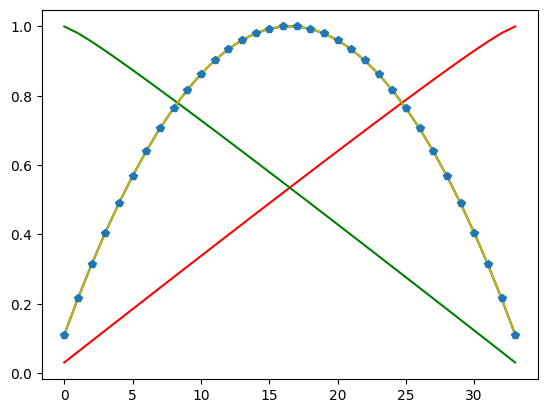

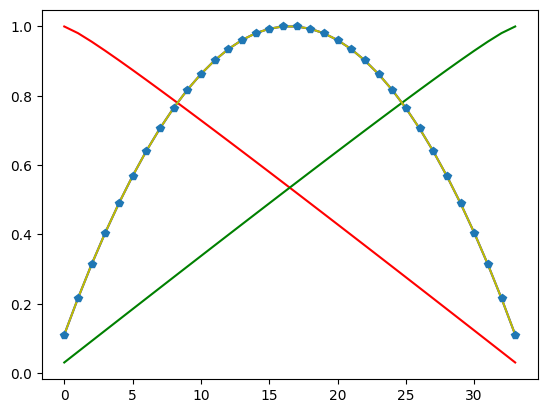

In [36]:
import matplotlib.pyplot as plt

ranking = np.arange(35)

loss_loss_ranking = []
loss_perdida_listas = []
loss_mse = []
loss_diferencia_listas = []
loss_mae = []

for i in range(len(ranking)-1) :
  #pred_ranking = np.roll(ranking, -i-1)
  pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = loss_ranking(ranking, pred_ranking )
  loss_loss_ranking.append(loss)
  print("loss ranking: " + str(loss))
  loss = perdida_listas(ranking, pred_ranking )
  loss_perdida_listas.append(loss)
  print("perdida_listas: " + str(loss))
  loss = mse(ranking, pred_ranking )
  loss_mse.append(loss)
  print("mse: " + str(loss))
  loss = diferencia_listas(ranking, pred_ranking )
  loss_diferencia_listas.append(loss)
  print("diferencia_listas: " + str(loss))
  loss = mae(ranking, pred_ranking )
  loss_mae.append(loss)
  print("mae: " + str(loss))

loss_loss_ranking = np.array(loss_loss_ranking)
loss_perdida_listas = np.array(loss_perdida_listas)
loss_mse = np.array(loss_mse)
loss_diferencia_listas = np.array(loss_diferencia_listas)
loss_mae = np.array(loss_mae)


plt.figure()
plt.plot(loss_loss_ranking / loss_loss_ranking.max(), 'r');
plt.plot(loss_perdida_listas / loss_perdida_listas.max(), 'g');
plt.plot(loss_mse / loss_mse.max(), 'b');
plt.plot(loss_diferencia_listas / loss_diferencia_listas.max(), 'y');
plt.plot(loss_mae / loss_mae.max(), 'p');

print("---------------------")

loss_loss_ranking = []
loss_perdida_listas = []
loss_mse = []
loss_diferencia_listas = []
loss_mae = []

for i in range(len(ranking)-1):
  pred_ranking = np.roll(ranking, -i-1)
  #pred_ranking = np.roll(ranking, i+1)
  print(pred_ranking)
  loss = loss_ranking(ranking, pred_ranking )
  loss_loss_ranking.append(loss)
  print("loss ranking: " + str(loss))
  loss = perdida_listas(ranking, pred_ranking )
  loss_perdida_listas.append(loss)
  print("perdida_listas: " + str(loss))
  loss = mse(ranking, pred_ranking )
  loss_mse.append(loss)
  print("mse: " + str(loss))
  loss = diferencia_listas(ranking, pred_ranking )
  loss_diferencia_listas.append(loss)
  print("diferencia_listas: " + str(loss))
  loss = mae(ranking, pred_ranking )
  loss_mae.append(loss)
  print("mae: " + str(loss))

plt.figure()
loss_loss_ranking = np.array(loss_loss_ranking)
loss_perdida_listas = np.array(loss_perdida_listas)
loss_mse = np.array(loss_mse)
loss_diferencia_listas = np.array(loss_diferencia_listas)
loss_mae = np.array(loss_mae)

plt.plot(loss_loss_ranking / loss_loss_ranking.max(), 'r');
plt.plot(loss_perdida_listas / loss_perdida_listas.max(), 'g');
plt.plot(loss_mse / loss_mse.max(), 'b');
plt.plot(loss_diferencia_listas / loss_diferencia_listas.max(), 'y');
plt.plot(loss_mae / loss_mae.max(), 'p');





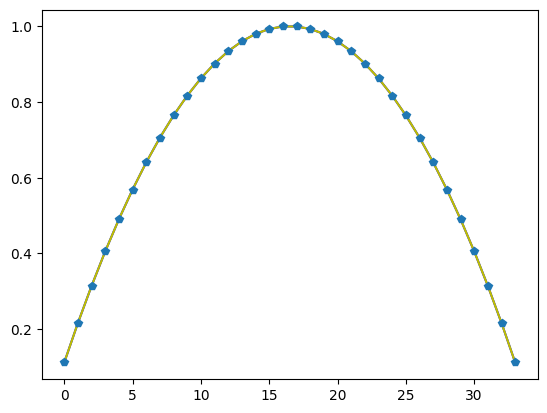

In [41]:
#plt.plot(loss_loss_ranking / loss_loss_ranking.max(), 'r');
#plt.plot(loss_perdida_listas / loss_perdida_listas.max(), 'g');
plt.plot(loss_mse / loss_mse.max(), 'b');
plt.plot(loss_diferencia_listas / loss_diferencia_listas.max(), 'y');
plt.plot(loss_mae / loss_mae.max(), 'p');

In [ ]:

"""

#1#

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34  0]
loss ranking: tf.Tensor(3404.1023, shape=(), dtype=float32)
perdida_listas: tf.Tensor(105.07248, shape=(), dtype=float32)
mse: tf.Tensor(68.0, shape=(), dtype=float32)

#-1#
[34  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33]
loss ranking: tf.Tensor(105.07247, shape=(), dtype=float32)
perdida_listas: tf.Tensor(3404.1018, shape=(), dtype=float32)
mse: tf.Tensor(68.0, shape=(), dtype=float32)
"""

# Y normalizada

In [ ]:
import numpy as np

## PARA SIGMOIDE

In [ ]:
r = np.array([10,0,20,40,30])

In [ ]:
np.argsort(r)

In [ ]:
r_norm = r/r.max()
r_norm

In [ ]:
np.argsort(r_norm)

# PARA TANH

In [ ]:
r = np.array([10,0,20,40,30])

r_norm = 2*(r - min(r)) / (max(r) - min(r)) - 1
r_norm